In [1]:
path =  '/mnt/data/zhujun/dataset/Youtube/'
from PIL import Image
import os
import numpy as np
import sys
sys.path.append('../')

from benchmarking.video import YoutubeVideo
from benchmarking.utils.model_utils import eval_single_image
from benchmarking.utils.utils import interpolation, compute_f1


In [2]:
import glob
def load_vigil_result(path):
    vigil_perf = {}
    for file in glob.glob(path + 'results/vigil_e2e_result*.csv'):
        if 'with_videosize' not in file:
            continue
        print(file)
        with open(file, 'r') as f:
            firstline = f.readline()
#             print(firstline)
            for line in f:
                line_list = line.strip().split(',')
                key = line_list[0]
                bw = float(line_list[1])
                f1 = float(line_list[2])
                vigil_perf[key] = (bw, f1)
    return vigil_perf

In [3]:
vigil_perf = load_vigil_result('./vigil/')


./vigil/results/vigil_e2e_result_motorway_with_videosize.csv
./vigil/results/vigil_e2e_result_nyc_with_videosize.csv
./vigil/results/vigil_e2e_result_cropped_crossroad4_2_with_videosize.csv
./vigil/results/vigil_e2e_result_driving2_with_videosize.csv
./vigil/results/vigil_e2e_result_crossroad_with_videosize.csv
./vigil/results/vigil_e2e_result_driving_downtown_with_videosize.csv
./vigil/results/vigil_e2e_result_park_with_videosize.csv
./vigil/results/vigil_e2e_result_crossroad2_with_videosize.csv
./vigil/results/vigil_e2e_result_jp_with_videosize.csv
./vigil/results/vigil_e2e_result_lane_split_with_videosize.csv
./vigil/results/vigil_e2e_result_russia_with_videosize.csv
./vigil/results/vigil_e2e_result_tw_under_bridge_with_videosize.csv
./vigil/results/vigil_e2e_result_driving1_with_videosize.csv
./vigil/results/vigil_e2e_result_crossroad3_with_videosize.csv
./vigil/results/vigil_e2e_result_drift_with_videosize.csv
./vigil/results/vigil_e2e_result_tw_road_with_videosize.csv
./vigil/res

In [4]:
def load_noscope_result(path):
    noscope_perf = {}
    for file in glob.glob(path + 'Noscope_e2e*.csv'):
        if 'with_frame_diff' not in file:
            continue
        print(file)
        with open(file, 'r') as f:
            f.readline()
            for line in f:
                line_list = line.strip().split(',')
                key = line_list[0]
                bw = float(line_list[3])
                f1 = float(line_list[2])
                noscope_perf[key] = (bw, f1)                
    return noscope_perf

In [5]:
noscope_perf = load_noscope_result('./noscope/')

./noscope/Noscope_e2e_result_driving2_with_frame_diff.csv
./noscope/Noscope_e2e_result_crossroad4_with_frame_diff.csv
./noscope/Noscope_e2e_result_crossroad3_with_frame_diff.csv
./noscope/Noscope_e2e_result_cropped_crossroad4_with_frame_diff.csv
./noscope/Noscope_e2e_result_crossroad_with_frame_diff.csv
./noscope/Noscope_e2e_result_driving1_with_frame_diff.csv
./noscope/Noscope_e2e_result_drift_with_frame_diff.csv
./noscope/Noscope_e2e_result_highway_with_frame_diff.csv
./noscope/Noscope_e2e_result_driving_downtown_with_frame_diff.csv
./noscope/Noscope_e2e_result_cropped_crossroad4_2_with_frame_diff.csv


driving2_37 (1.18489662416607, 0.9122807017543859) (1.3936614240549863, 0.8518518518518519)
drift_3 (5.505393174500827, 0.7449664429530202) (11.285041852028609, 0.6355140186915889)
drift_7 (5.970699900697882, 0.6476190476190476) (11.351120717792687, 0.3137254901960784)
drift_9 (4.966108758322937, 0.625) (9.411093129212967, 0.5899280575539568)
drift_11 (5.596192714048523, 0.7053571428571429) (11.934705074657735, 0.7011494252873562)
drift_16 (5.605683829257491, 0.6106870229007634) (10.998909609647331, 0.5076923076923077)
drift_24 (5.13661002597806, 0.5910290237467019) (9.257676303850614, 0.5833333333333334)
drift_26 (6.302340343952938, 0.8857142857142857) (14.155906965395568, 0.6492146596858638)
drift_31 (5.8395417263252005, 0.5662650602409638) (11.32906155198509, 0.38024691358024687)
drift_34 (6.185005146611803, 0.6216216216216215) (13.540969187596856, 0.5550660792951542)


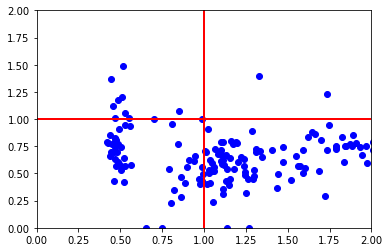

In [7]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1)

for key in noscope_perf.keys():
    if key not in vigil_perf:
        print('{} missing'.format(key))
        continue
    if noscope_perf[key][1] == 0 or noscope_perf[key][0] == 0:
        continue
    relative_f1 = vigil_perf[key][1]/noscope_perf[key][1]
    relative_bw = vigil_perf[key][0]/noscope_perf[key][0]
    if relative_f1 > 1 and relative_bw < 1:
        print(key, vigil_perf[key], noscope_perf[key])
    if 'cropped' in key:
        continue
    ax.scatter(relative_bw, relative_f1, c='b')
    ax.axhline(y=1, color='r', linestyle='-')
    ax.axvline(x=1, color='r', linestyle='-')
    ax.set_xlim(0,2)
    ax.set_ylim(0,2)